# **Hands-On Machine Learning Workshop**

## **Introduction**

### **Setting Up Your Environment**
Before diving into the workshop, ensure you have Python installed along with the required libraries.

#### **Step 1: Install Required Libraries**
To install the necessary Python libraries, run the following command in your terminal or Notebook:
```bash
pip install numpy pandas matplotlib seaborn scikit-learn
```


In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **2. Load and Explore the Dataset**

### **What is the Dataset?**
We will be using the **Breast Cancer Wisconsin Dataset**, a commonly used dataset for binary classification tasks. This dataset contains information about tumor features such as radius, texture, and symmetry, and the goal is to predict whether a tumor is malignant or benign.


First 5 Rows of the Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


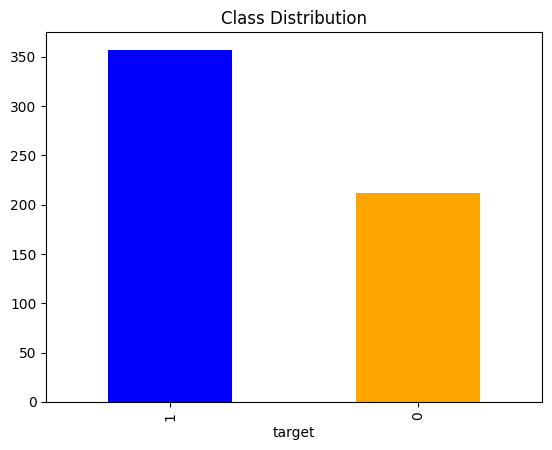

In [ ]:
# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("\nFirst 5 Rows of the Dataset:")
display(df.head())

# Checking Class Distribution
df['target'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Class Distribution')
plt.show()

## **3. Preprocessing the Data**

### **Why Preprocessing is Important**
Preprocessing ensures that the data is in a format suitable for training machine learning models. Steps include handling missing values, standardizing features, and splitting data into training and testing sets.

Since our main focus is on model training for this workshop, we will use the code below to skip this step.

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **4. Experimenting with Classification Models**

### **What are Classification Models?**
Classification models predict discrete labels (e.g., malignant or benign). For this dataset, classifiers are well-suited, and we aim to determine which of the following models performs best:
- **Random Forest**: An ensemble of decision trees.
- **K-Nearest Neighbors (KNN)**: Predicts based on the closest neighbors.
- **Support Vector Machine (SVM)**: Creates a hyperplane to separate classes.

I've also added the **documentation** of each of these models from the **scikit-learn library**, which will come in handy for future steps:
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

First, let's go ahead and import them from the library.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Now, we want to create a dictionary of models and test all three to determine which one best represents the data. The Random Forest classifier has already been instantiated in the following code. You should add the K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) classifiers yourself. Remember, the documentation will be useful.


In [ ]:
# Define a Dictionary of Models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2), # <-- REPLACE THIS: KNeighborsClassifier(...),
    'Support Vector Machine': SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)# <-- REPLACE THIS: SVC(...)
}
# Initialize an empty dictionary to store model results
results = {}

# Loop through each model in the dictionary
for name, model in models.items():
  if model is not None:
    print(f"Training {name}...")
    # TODO: Train the model using the training data (HINT: Make sure the model is correctly initialized before this step!)
    model.fit(X_train, y_train)
    # TODO: Use the trained model to make predictions on the test set
    y_pred = model.predict(X_test)     # <-- REPLACE THIS:
    # TODO: Calculate accuracy using accuracy_score function
    acc = accuracy_score(y_test, y_pred)
    # Append accuracy and display it
    results[name] = acc
    print(f"\nAccuracy for {name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Training Random Forest...

Accuracy for Random Forest: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Training K-Nearest Neighbors...

Accuracy for K-Nearest Neighbors: 0.9474
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Training Support Vector Machine...

Accuracy for Support Vector Machine: 0.9825
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.

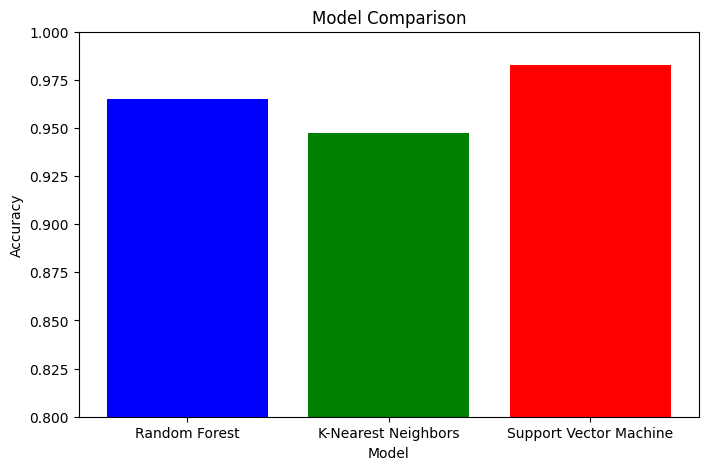

In [ ]:
# Plot Model Comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0.8, 1.0])
plt.show()

In [ ]:
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name}")

Best Model: Support Vector Machine


## **5. Hyperparameter Tuning**

### **Why Tune Hyperparameters?**
Hyperparameters are external configurations of models that are not learned from the data but set prior to the training process. Examples include the number of neighbors in K-Nearest Neighbors (KNN) and the regularization parameter in Support Vector Machines (SVM). Proper tuning of these hyperparameters can significantly enhance model performance and lead to more accurate predictions.

### **Common Hyperparameters for Selected Models:**

- **Random Forest:**
  - `n_estimators`: Number of trees in the forest.
  - `max_depth`: Maximum depth of each tree.
  - `min_samples_split`: Minimum number of samples required to split an internal node.

- **K-Nearest Neighbors (KNN):**
  - `n_neighbors`: Number of neighbors to use.
  - `weights`: Function to weight neighbors ('uniform' or 'distance').
  - `metric`: Distance metric used for the tree.

- **Support Vector Machine (SVM):**
  - `C`: Regularization parameter that controls the trade-off between achieving a low error and maintaining a simple decision boundary.
  - `kernel`: Specifies the kernel type to be used in the algorithm (e.g., 'linear', 'rbf', 'poly').
  - `gamma`: Kernel coefficient that defines the influence of a single training example on the decision boundary.

### **Methods for Hyperparameter Tuning:**

1. **Grid Search:**  
   An exhaustive search over a specified parameter grid, evaluating all possible combinations. While thorough, it can be computationally intensive.

2. **Random Search:**  
   Randomly samples from the parameter space. It is less exhaustive than grid search but often finds good results with less computational effort.

3. **Bayesian Optimization:**  
   Builds a probabilistic model of the objective function and uses it to select the most promising hyperparameters to evaluate.

💡**We will be focusing on Grid Search for the purpose of this workshop!**💡

For a comprehensive guide on hyperparameter tuning, refer to the [Scikit-learn documentation on tuning hyper-parameters](https://scikit-learn.org/stable/modules/grid_search.html).

### **Next Steps**
Now that you understand why tuning hyperparameters is important, explore the **documentation for each of the Classifiers** to find reasonable values to test. Experiment with different hyperparameter settings for each model and observe how they impact performance.


As before, we start you off with the Random Forest code is there for you, fill in the rest based on the documentation and hints provided.


In [ ]:
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    best_model = RandomForestClassifier(random_state=42)
elif best_model_name == 'K-Nearest Neighbors':
    param_grid = {
        'n_neighbors': [3, 5, 7],  # <--- REPLACE THIS with an array of values: [...]
        'weights': ['uniform', 'distance']  # <--- REPLACE THIS with an array of values: [____, ____]
    }
    best_model = KNeighborsClassifier()
elif best_model_name == 'Support Vector Machine':
    param_grid = {
        'C': [0.1, 1, 10], # <--- REPLACE THIS with an array of values: [...]
        'gamma': ['scale', 'auto', 0.01, 0.1], # <--- REPLACE THIS with an array of values: [...]
        'kernel': ['linear', 'rbf', 'poly'] # <--- REPLACE THIS with an array of values: [...]
    }
    best_model = SVC()

In [ ]:
# Hyperparameter Tuning
print("\nTuning Hyperparameters...")
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# TODO: Perform hyperparameter tuning by re-training the models on different parameter combinations
# HINT: GridSearchCV will automatically test all specified hyperparameter values and find the best combination.
# grid_search. ?


Tuning Hyperparameters...


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
# Best Parameters and Accuracy
print(f"Best Parameters for {best_model_name}: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
# TODO: Retrieve the best model found by GridSearchCV
# HINT: Use an attribute of grid_search that stores the best model based on scoring criteria.
# grid_search. ?

Best Parameters for Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Evaluate Best Model
y_pred_best = best_model.predict(X_test)
print("\nAccuracy After Tuning:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report After Tuning:\n", classification_report(y_test, y_pred_best))



Accuracy After Tuning: 0.9824561403508771

Classification Report After Tuning:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## **🎉 Conclusion & Next Steps**

Congratulations on completing this hands-on workshop on **supervised learning and hyperparameter tuning**! 🎯  

We hope this experience has helped you **better understand how to train, evaluate, and optimize machine learning models**. The skills you’ve practiced—such as model selection, hyperparameter tuning, and performance evaluation—will be invaluable as you apply ML techniques to real-world problems.  

Remember, **experimentation is key**! Try adjusting different hyperparameters, testing other classifiers, to deepen your understanding of your dataset.  

### **🚀 Want to Go Further?**
The next section on **Unsupervised Learning** is **optional** and on **K-Means Clustering**, a powerful technique for finding hidden patterns in data. You’ll be applying it to the same dataset, and compare the accuracies.  

**Feel free to use this notebook later on to explore, experiment, and most importantly—have fun with machine learning!**




## **6. [OPTIONAL] Exploring Unsupervised Learning**

### **Clustering with K-Means**
Unlike supervised learning, which relies on labeled data, **unsupervised learning** finds patterns in data **without predefined labels**.  

One of the most widely used techniques is **K-Means Clustering**, which groups similar data points into **K clusters** by minimizing variance within each cluster.

### **How Does K-Means Work?**
1. Selects **K** random cluster centers (centroids).  
2. Assigns each data point to the closest centroid.  
3. Updates centroids based on assigned points.  
4. Repeats until centroids stabilize or a max number of iterations is reached.

🔗 **Reference:** [Scikit-learn K-Means documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### **Choosing the Right Number of Clusters**
Since **K** is a hyperparameter, selecting the right number of clusters is important. Two common techniques are:

#### **1️⃣ The Elbow Method**
- Plots **inertia** (sum of squared distances from points to their closest centroid) for different values of **K**.
- The "elbow" point suggests the optimal **K**.

#### **2️⃣ The Silhouette Score**
- Measures how well each point fits within its cluster.
- **Higher scores (close to 1)** indicate well-separated clusters.
- **Lower or negative scores** suggest poor clustering.

📖 **Learn More:** [Silhouette Score in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

### **Your Task:**
1. **Run K-Means on the dataset** and test different values of **K**.  
2. **Use the Elbow Method** to find an optimal starting point.  
3. **Calculate the Silhouette Score** to evaluate clustering quality.  


**Happy clustering!**




In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Step 1: Try different values of K and plot inertia (Elbow Method)
inertia_values = []
K_values = range(2, 11)  # Testing K from 2 to 10

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)  # Assuming X is your dataset
    inertia_values.append(kmeans.inertia_)

Looking at your plot from the **Elbow Method**, you’ll notice that inertia decreases as the number of clusters increases. However, the rate of decrease slows down after a certain point, forming an elbow-like shape.

HINT: The dataset should already give you the intiution of how many clusters you need in this situation, still, it be a good exercise to go over the process!

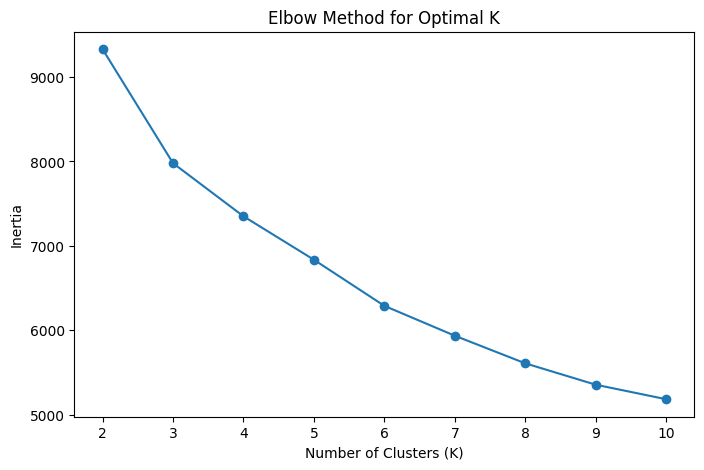

In [ ]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
## Step 2: Choose a K value and fit the model
optimal_k = 2 # <--REPLACE THIS
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)
clusters = kmeans.predict(X)

In [ ]:
# Step 3: Evaluate Clustering with Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.4f}")

Silhouette Score for K=2: 0.6973


You can also play around with k values lower or higher than one you chose to check if it's the most optimal!

## **Final Thoughts and Reflection**

Based on the **Silhouette Score** from clustering and the **highest accuracy** from supervised models:
- **Which approach (clustering vs. classification) is better for this dataset, and why?**
- Given the dataset's labeled nature, why might supervised learning perform better?
- Can you think of scenarios where clustering might still be useful for this dataset?

Reflect on how the presence of clear labels impacts performance and the limitations of unsupervised methods for binary classification tasks.


Ok...we are done for good this time!

# **Thank you for participating!** 🎉  